In [53]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [55]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [56]:
coordinates

[(-23.82298054177528, 138.88573234215846),
 (85.71335610739672, -161.5184842348043),
 (-4.375828488480849, 81.82044610233339),
 (35.801581183957154, 79.44893546525213),
 (56.60332527578527, -94.75807099587965),
 (60.731011472383955, -132.981977525591),
 (-51.40081337901211, -81.71556639065913),
 (-16.22444623257195, -164.7097178393016),
 (31.92793973329431, 127.32580658626767),
 (61.14462522674626, -146.87825868250064),
 (29.813585697655924, -66.13028047702478),
 (-89.356313464612, -41.65109669439474),
 (-55.910358406312156, 66.22647328846139),
 (-12.50784203322165, -124.48707184718351),
 (-28.075517440231657, 8.480223049465707),
 (-34.1511952656728, 65.09956984706255),
 (70.25311755729967, -19.58361110068776),
 (-59.181172352392196, -76.66510788741564),
 (-9.225805266061514, 40.371046461579766),
 (-20.528607424909865, -3.2681843692550956),
 (5.630234853462085, -45.724780154403135),
 (-56.827569447764844, 154.04120490582415),
 (59.08316813733464, -173.46729690899807),
 (-24.87440432949

In [57]:
from citipy import citipy


In [58]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [59]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [60]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [61]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [62]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | leh
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | fukue
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | lindi
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | amapa
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | provideniya
Processing Record 23 of Set 1 | caravelas
Processing Record 24 of Set 1 | qaana

Processing Record 38 of Set 4 | namatanai
Processing Record 39 of Set 4 | tank
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | qinhuangdao
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | paka
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | ribeira brava
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | lamu
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | onega
Processing Record 50 of Set 4 | lamar
Processing Record 1 of Set 5 | trairi
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | sandy bay
Processing Record 6 of Set 5 | careiro da varzea
Processing Record 7 of Set 5 | arco
Processing Record 8 of Set 5 | brainerd
Processing Record 9 of Set 5 | golden
Processing Record 10 of Set 5 | tori
Processing Record 11 of Set 5 | goderich
Processing Record 12 of Set 5 | ca

Processing Record 25 of Set 8 | pacific grove
Processing Record 26 of Set 8 | kaeo
Processing Record 27 of Set 8 | san juan de uraba
Processing Record 28 of Set 8 | barda
Processing Record 29 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 8 | perpignan
Processing Record 31 of Set 8 | pangody
Processing Record 32 of Set 8 | mayo
Processing Record 33 of Set 8 | honningsvag
Processing Record 34 of Set 8 | ukiah
Processing Record 35 of Set 8 | beringovskiy
Processing Record 36 of Set 8 | altus
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | paamiut
Processing Record 39 of Set 8 | kenora
Processing Record 40 of Set 8 | andenes
Processing Record 41 of Set 8 | ayagoz
Processing Record 42 of Set 8 | yanam
Processing Record 43 of Set 8 | ukholovo
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | senneterre
Processing Record 46 of Set 8 | markala
Processing Record 47 of Set 8 | otane
Processing Record 48 of Set 8 | da

Processing Record 17 of Set 12 | brandon
Processing Record 18 of Set 12 | victor harbor
Processing Record 19 of Set 12 | christchurch
Processing Record 20 of Set 12 | matamoros
Processing Record 21 of Set 12 | makambako
Processing Record 22 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 23 of Set 12 | skibbereen
Processing Record 24 of Set 12 | walvis bay
Processing Record 25 of Set 12 | beech grove
Processing Record 26 of Set 12 | zlobin
Processing Record 27 of Set 12 | baijiantan
Processing Record 28 of Set 12 | sigli
Processing Record 29 of Set 12 | aflu
City not found. Skipping...
Processing Record 30 of Set 12 | salmas
Processing Record 31 of Set 12 | komsomolskiy
Processing Record 32 of Set 12 | taonan
Processing Record 33 of Set 12 | inyonga
Processing Record 34 of Set 12 | kenai
Processing Record 35 of Set 12 | muros
Processing Record 36 of Set 12 | xining
Processing Record 37 of Set 12 | woodward
Processing Record 38 of Set 12 | chingirlau
Processing Recor

In [64]:
len(city_data)

566

In [68]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,-20.7333,139.5000,85.77,66,75,14.97,AU,2022-01-26 01:13:13
1,Barrow,71.2906,-156.7887,-5.78,77,75,21.85,US,2022-01-26 01:08:48
2,Hithadhoo,-0.6000,73.0833,81.10,67,100,17.94,MV,2022-01-26 01:13:14
3,Leh,34.1667,77.5833,-5.60,88,100,3.89,IN,2022-01-26 01:13:14
4,Thompson,55.7435,-97.8558,-2.79,86,100,12.95,CA,2022-01-26 01:13:15
5,Whitehorse,60.7161,-135.0538,16.50,94,48,4.72,CA,2022-01-26 01:13:15
6,Punta Arenas,-53.1500,-70.9167,46.51,57,0,14.97,CL,2022-01-26 01:13:16
7,Alofi,-19.0595,-169.9187,80.49,89,75,6.91,NU,2022-01-26 01:13:16
8,Fukue,32.6881,128.8419,49.84,66,4,17.27,JP,2022-01-26 01:13:17
9,Palmer,42.1584,-72.3287,29.68,60,0,11.50,US,2022-01-26 01:11:01


In [70]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]           
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Isa,AU,2022-01-26 01:13:13,-20.7333,139.5000,85.77,66,75,14.97
1,Barrow,US,2022-01-26 01:08:48,71.2906,-156.7887,-5.78,77,75,21.85
2,Hithadhoo,MV,2022-01-26 01:13:14,-0.6000,73.0833,81.10,67,100,17.94
3,Leh,IN,2022-01-26 01:13:14,34.1667,77.5833,-5.60,88,100,3.89
4,Thompson,CA,2022-01-26 01:13:15,55.7435,-97.8558,-2.79,86,100,12.95
5,Whitehorse,CA,2022-01-26 01:13:15,60.7161,-135.0538,16.50,94,48,4.72
6,Punta Arenas,CL,2022-01-26 01:13:16,-53.1500,-70.9167,46.51,57,0,14.97
7,Alofi,NU,2022-01-26 01:13:16,-19.0595,-169.9187,80.49,89,75,6.91
8,Fukue,JP,2022-01-26 01:13:17,32.6881,128.8419,49.84,66,4,17.27
9,Palmer,US,2022-01-26 01:11:01,42.1584,-72.3287,29.68,60,0,11.50


In [71]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [72]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

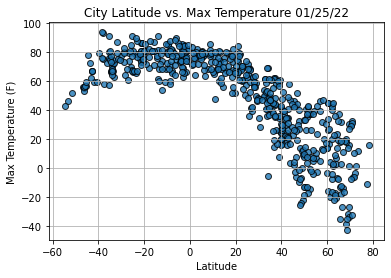

In [73]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


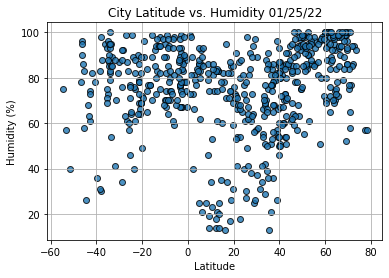

In [74]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

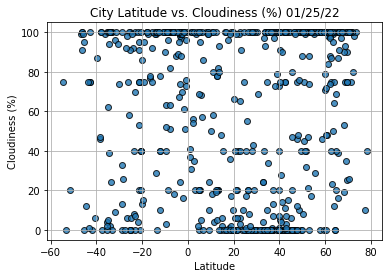

In [75]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


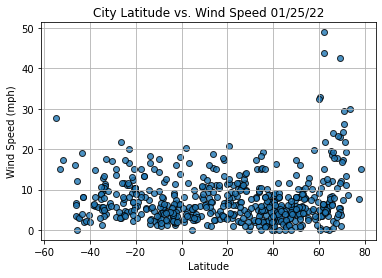

In [76]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [77]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2022-01-26 01:05:27
Lat                          -9.8
Lng                     -139.0333
Max Temp                    78.31
Humidity                       74
Cloudiness                      3
Wind Speed                  17.47
Name: 13, dtype: object

In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

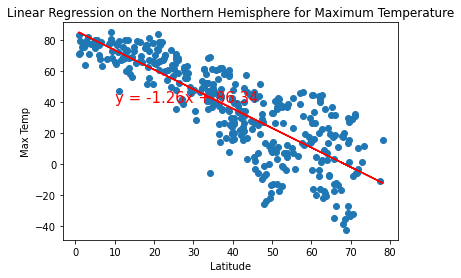

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


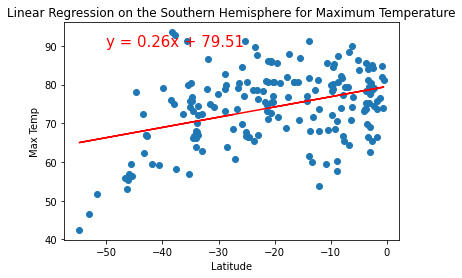

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


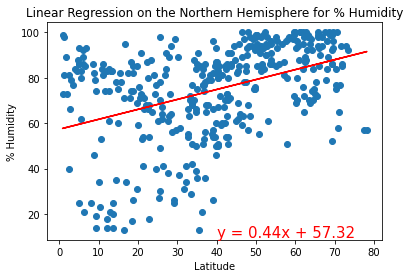

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

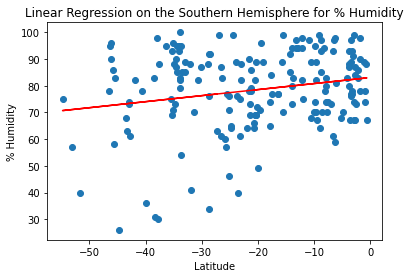

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

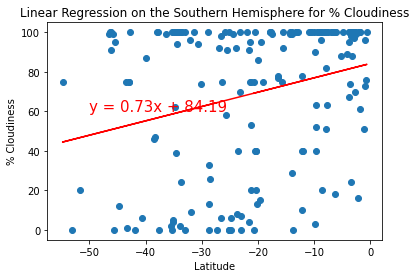

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

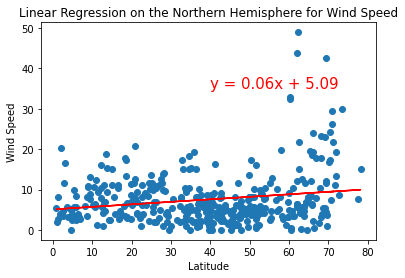

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


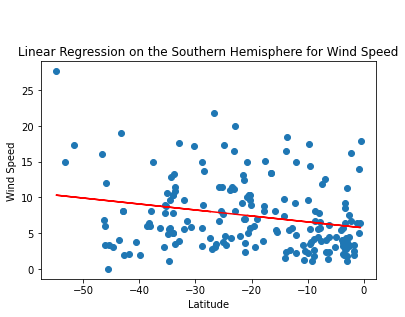

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
